<a href="https://colab.research.google.com/github/vikramkrishnan9885/MyColab/blob/master/BinaryImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps (LEPBLOTD)

1. Load Data
2. Explore data
3. Preprocessing Data
4. Building the model
5. defining the Loss model
6. defining Optimizer
7. Train and evaluating the model
8. Deploying the model

# Fetch data

## From local

In [0]:
#from google.colab import files
#uploaded = files.upload()

## From kaggle
This did not work in our case because our data comes from a competition not a data set

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
%cd /content/drive/My Drive/
%pwd

/content/drive/My Drive


'/content/drive/My Drive'

In [15]:
# Run the following code to provide the config path to kaggle.json
import os

# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

#changing the working directory
#Check the present working directory using pwd command
%cd /content/drive/My Drive/Kaggle
%pwd

/content/drive/My Drive/Kaggle


'/content/drive/My Drive/Kaggle'

In [16]:
!kaggle datasets download -d datasnaek/youtube-new

youtube-new.zip: Skipping, found more recently modified local copy (use --force to force download)


## Using google drive

In [1]:
!unzip '/content/drive/My Drive/Kaggle/histopathologic-cancer-detection.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif  
  inflating: train/fa2c775c4457d0aeb7e57216849eef5f4e72e566.tif  
  inflating: train/fa2c77e1707c2fe7b0016e00736fb6e4b7f09488.tif  
  inflating: train/fa2ce5e802dd281bd98fcfb538e80b9c96c2b7af.tif  
  inflating: train/fa2d24e4a109d2d3a925890aaed4e0f038dfffb0.tif  
  inflating: train/fa2d7e4865aa7869d2dd85116323b8405c94f1c2.tif  
  inflating: train/fa2d8b2e4acf46e278e2e7acbc034c263d970737.tif  
  inflating: train/fa2df9148831509a181797db79eb1a7bf39593f1.tif  
  inflating: train/fa2e6db0b35484797f58005e3a6e24ca75fbca76.tif  
  inflating: train/fa2e80e84594465329bdc0c8d1b3a507275fbb4d.tif  
  inflating: train/fa2eaf8ec6267fa928a88775dc15ee25b633c537.tif  
  inflating: train/fa2ebf31ff5954570526d4835ac5368fabc1f035.tif  
  inflating: train/fa2efd2dda5235a3e397ea0dd637ea13a78f7599.tif  
  inflating: train/fa2f1d5e86165f63c57acdf9d23521f2b8070e0c.tif  
  inflating: train/fa2ffa

# Explore data

In [0]:
import pandas as pd

## Read labels

In [3]:
path2csv = 'train_labels.csv'
labels_df=pd.read_csv(path2csv)
labels_df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


## Counts

In [4]:
labels_df['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

## Histogram of labels

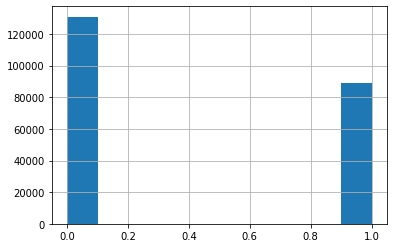

In [5]:
%matplotlib inline
labels_df['label'].hist()

## Let's visualize a few images that have a positive label. 

A positive label shows that the center 32 x 32 region of an image contains at least one pixel of tumor tissue.

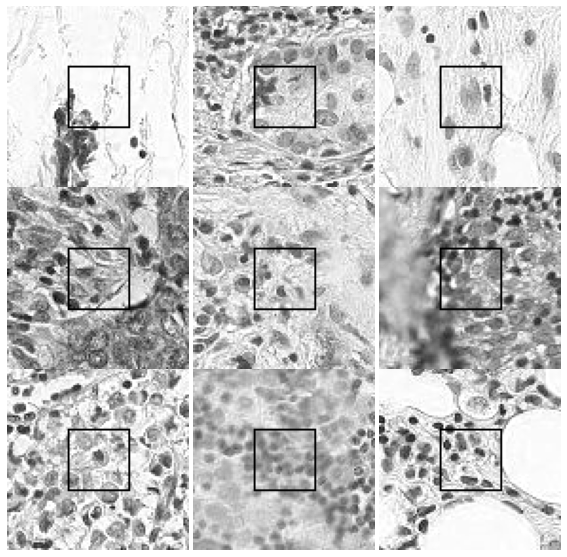

In [6]:
# First, we import the required packages:
import matplotlib.pylab as plt
from PIL import Image, ImageDraw
import numpy as np
import os
%matplotlib inline

# data is stored here
path2train="train/"

# show images in gray-scale, if you want color change it to True
color=False

# get ids for malignant images
malignantIds = labels_df.loc[labels_df['label']==1]['id'].values

# Next, we set the figure sizes
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
nrows,ncols=3,3

# Next, we display the images
for i,id_ in enumerate(malignantIds[:nrows*ncols]):
    full_filenames = os.path.join(path2train , id_ +'.tif')
 
    # load image
    img = Image.open(full_filenames)

    # draw a 32*32 rectangle 
    draw = ImageDraw.Draw(img)
    draw.rectangle(((32, 32), (64, 64)),outline="green")

    plt.subplot(nrows, ncols, i+1) 
    if color is True:
        plt.imshow(np.array(img))
    else:
        plt.imshow(np.array(img)[:,:,0],cmap="gray")
    plt.axis('off')

In [7]:
# Let's also get the image's shape and minimum and maximum pixel values
print("image shape:", np.array(img).shape)
print("pixel values range from %s to %s" %(np.min(img), np.max(img)))

image shape: (96, 96, 3)
pixel values range from 0 to 255
